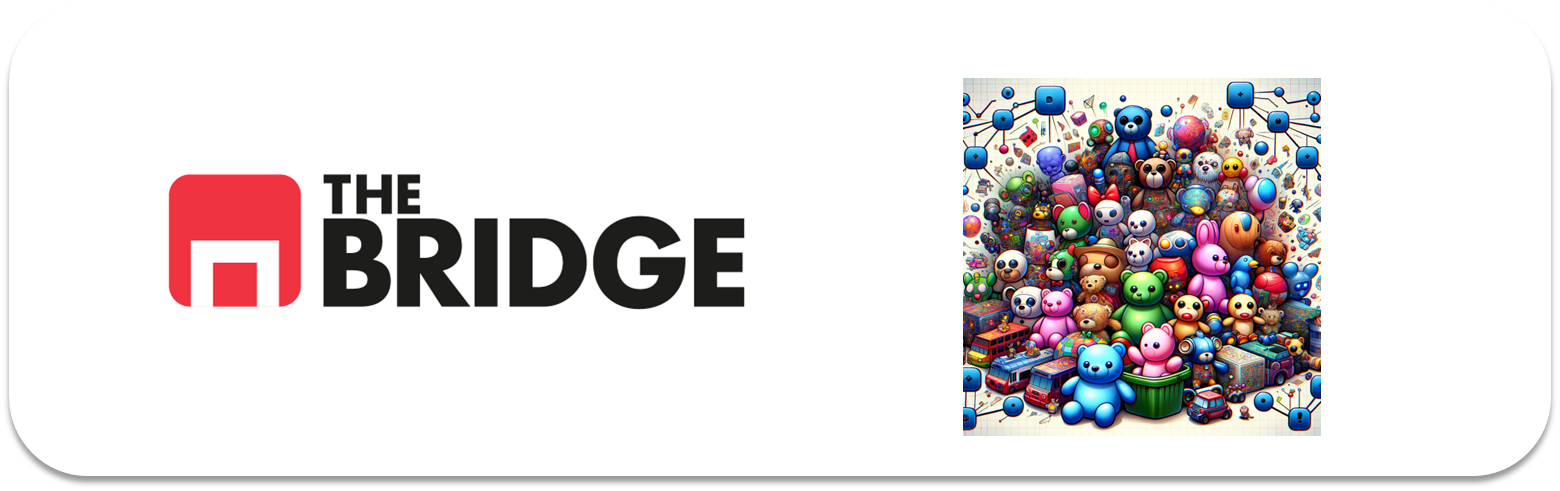

## PRACTICA OBLIGATORIA: **DBSCAN y Clustering Jerárquico**

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [34]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
pd.options.mode.copy_on_write = True

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [2]:
train_set = pd.read_csv("./data/empowering_drinks.csv", sep= "|")
train_set

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276
...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783
149,0.332758,-0.389355,-1.344582,0.280575,2.224236
150,0.209232,0.012732,-1.354622,0.296498,1.834923
151,1.395086,1.365208,-1.274305,-0.595160,1.791666


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [4]:
train_set.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


#### Mini-EDA

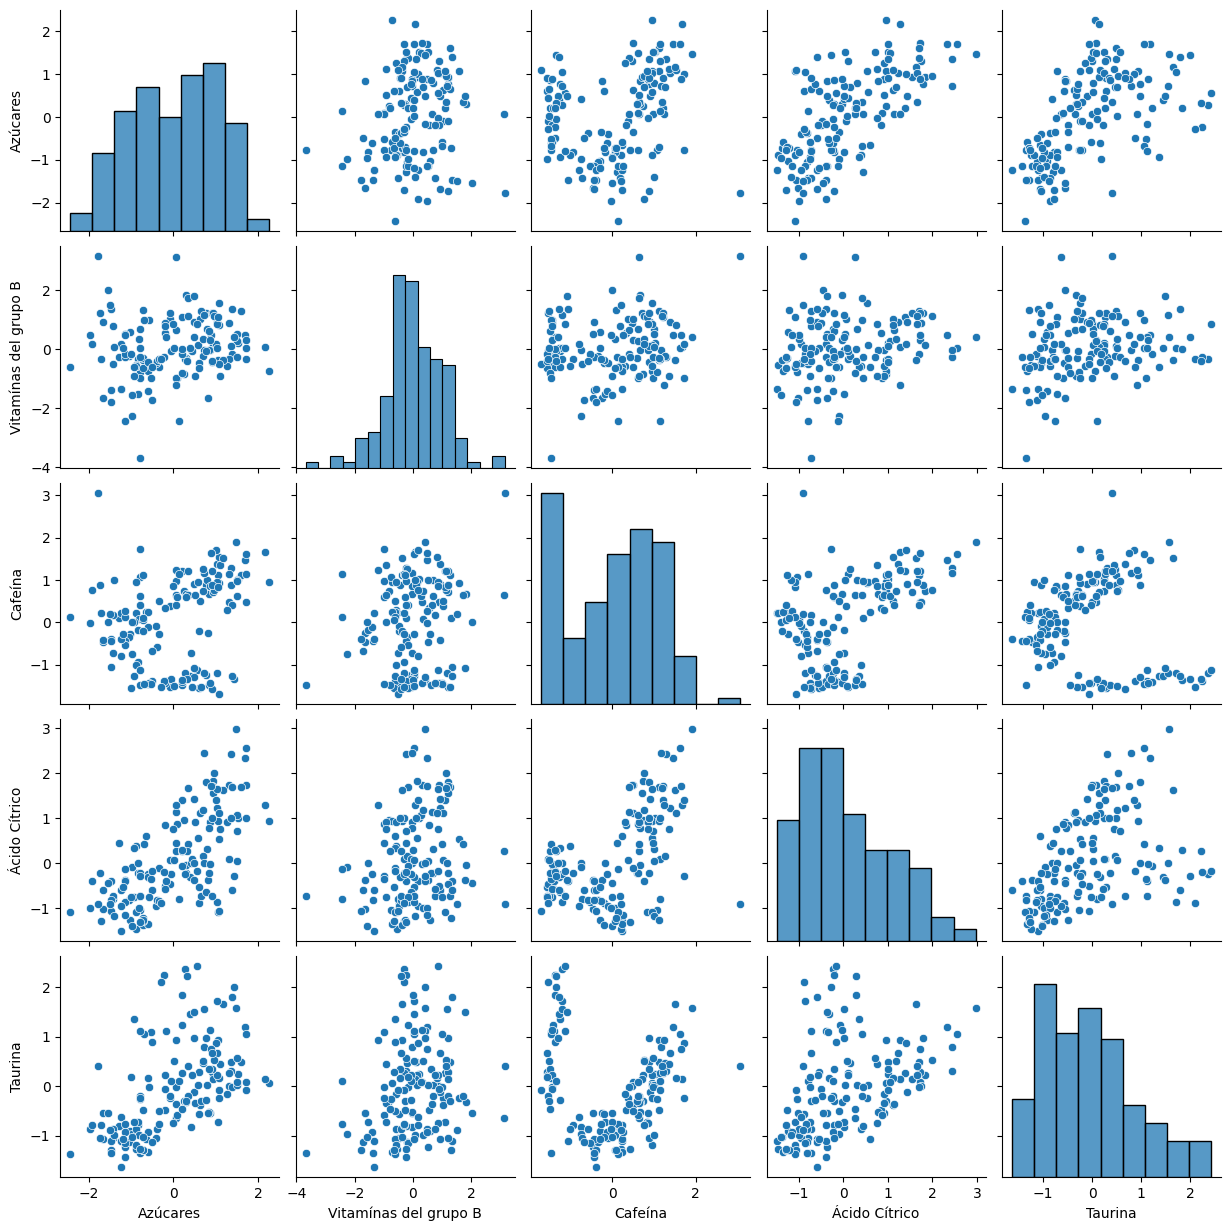

In [5]:
sns.pairplot(train_set)

In [6]:
for valores in combinations(train_set.columns, r= 2):
    print(valores)

('Azúcares', 'Vitamínas del grupo B')
('Azúcares', 'Cafeína')
('Azúcares', 'Ácido Cítrico')
('Azúcares', 'Taurina')
('Vitamínas del grupo B', 'Cafeína')
('Vitamínas del grupo B', 'Ácido Cítrico')
('Vitamínas del grupo B', 'Taurina')
('Cafeína', 'Ácido Cítrico')
('Cafeína', 'Taurina')
('Ácido Cítrico', 'Taurina')


Azúcares vs Vitamínas del grupo B


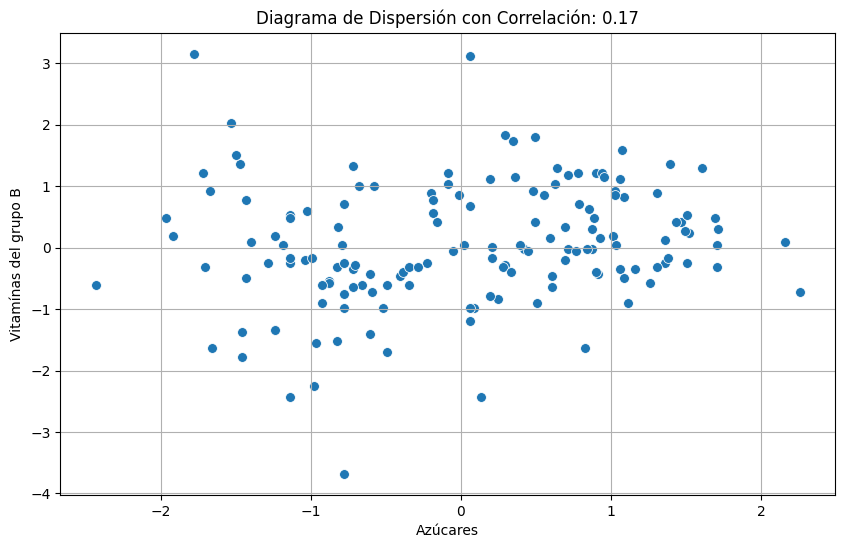

Azúcares vs Cafeína


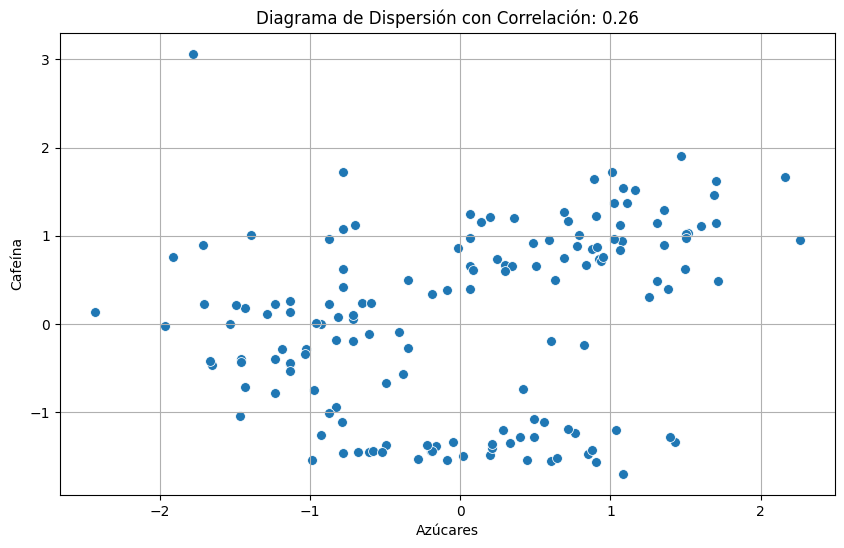

Azúcares vs Ácido Cítrico


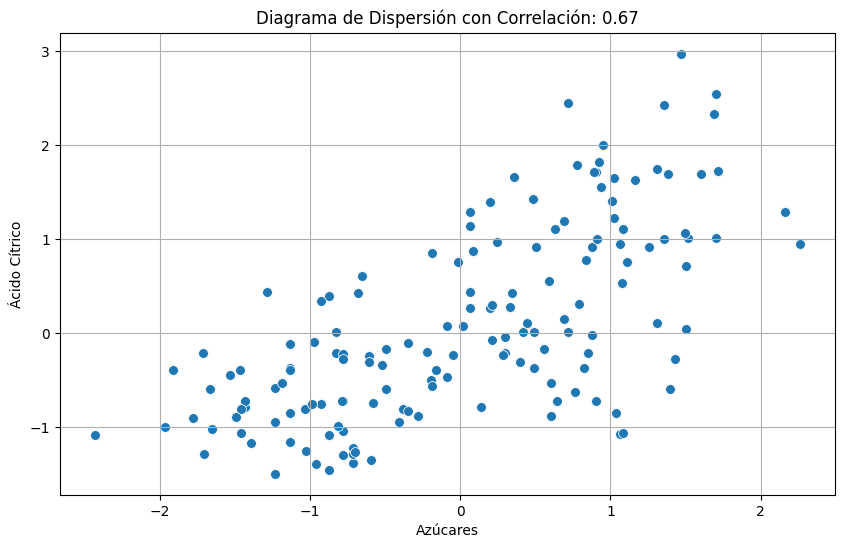

Azúcares vs Taurina


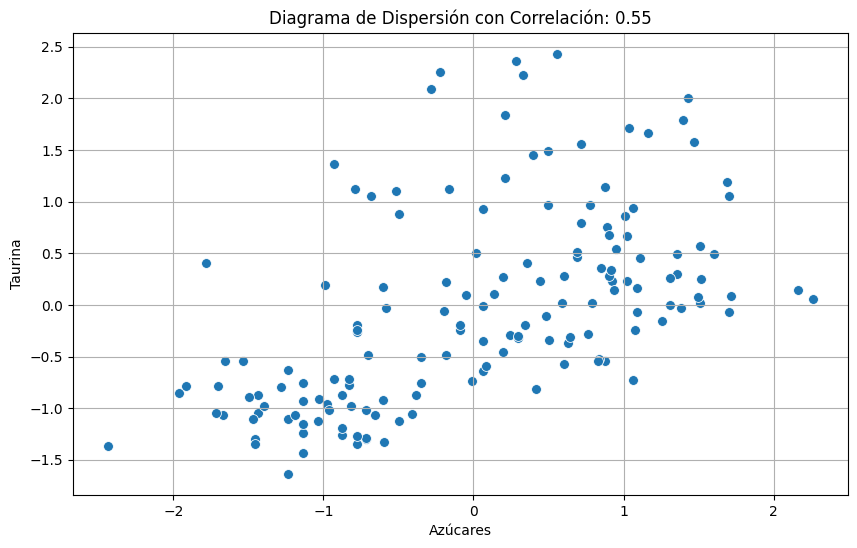

Vitamínas del grupo B vs Cafeína


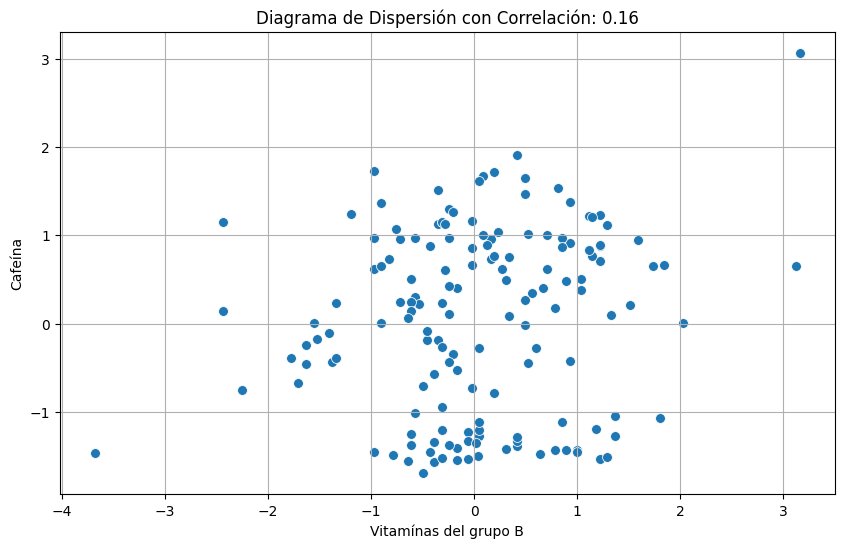

Vitamínas del grupo B vs Ácido Cítrico


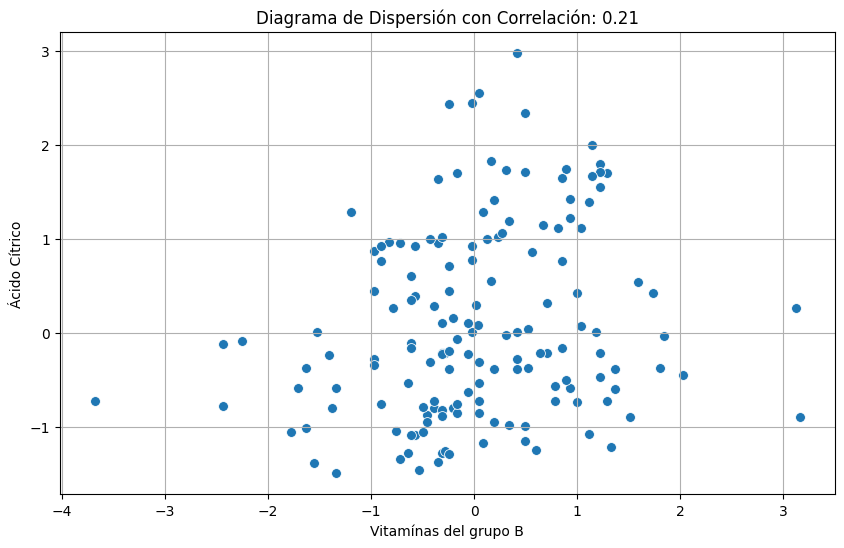

Vitamínas del grupo B vs Taurina


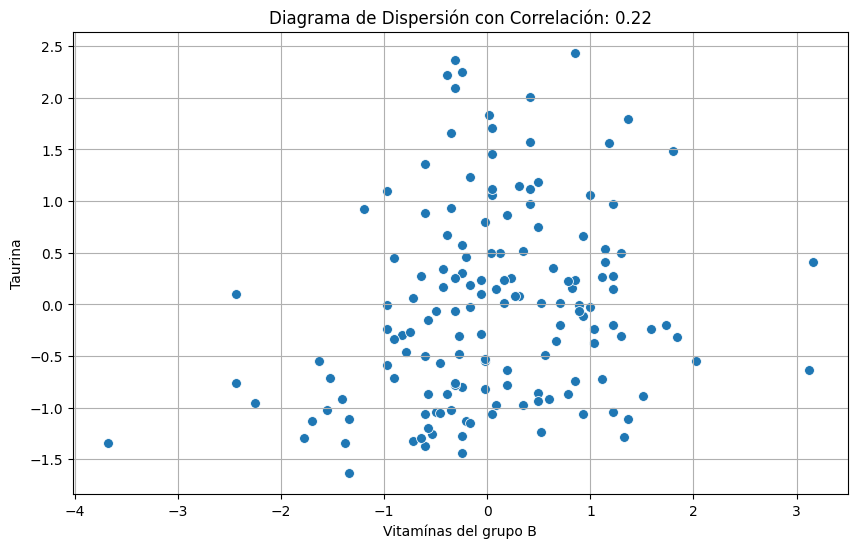

Cafeína vs Ácido Cítrico


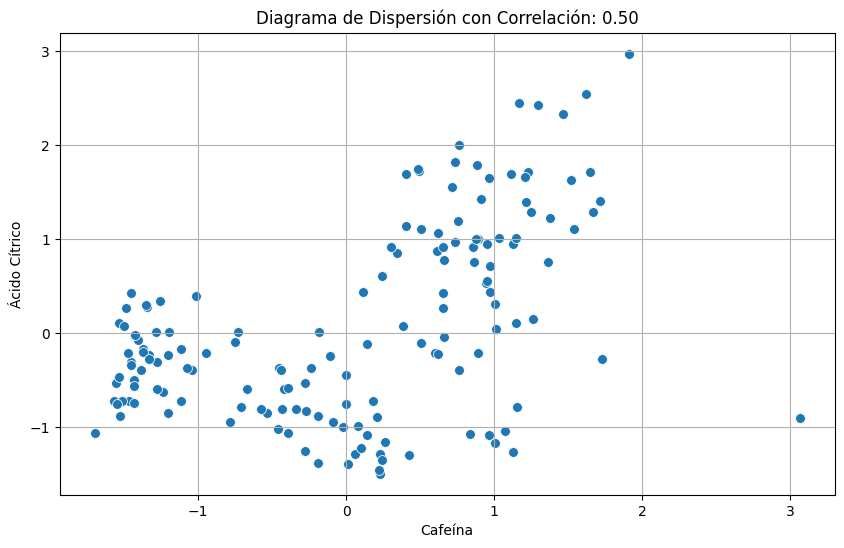

Cafeína vs Taurina


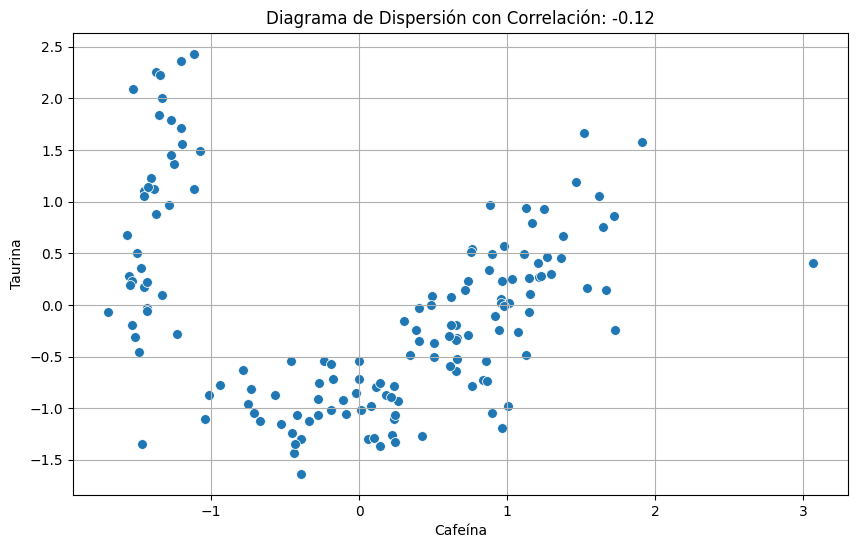

Ácido Cítrico vs Taurina


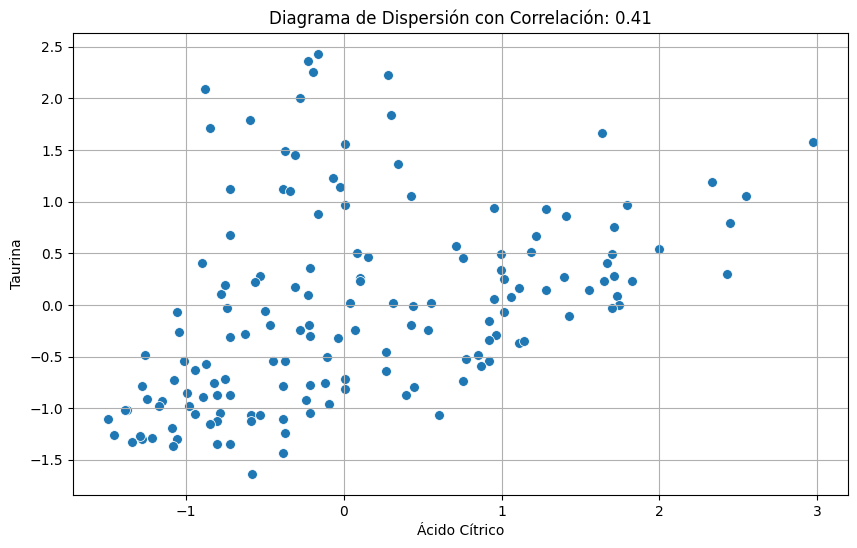

In [7]:
for x, y in combinations(train_set.columns, r= 2):
    print(f"{x} vs {y}")
    bt.grafico_dispersion_con_correlacion(train_set, x, y, mostrar_correlacion= True)

In [8]:
features_finales = ["Cafeína", "Taurina"]

#### Ajuste de hiperparámetros

In [9]:
outlier_percent = []
experiments = {}
for min_samples in [3,5,10]:
    print(f"Min_samples = {min_samples}")
    outlier_percent = []
    for eps in np.linspace(0.001,6,100):
        # creación de modelo
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(train_set[features_finales])
        # registro de anomalías
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
        outlier_percent.append(perc_outliers)
    experiments[min_samples] = outlier_percent.copy()

Min_samples = 3
Min_samples = 5
Min_samples = 10


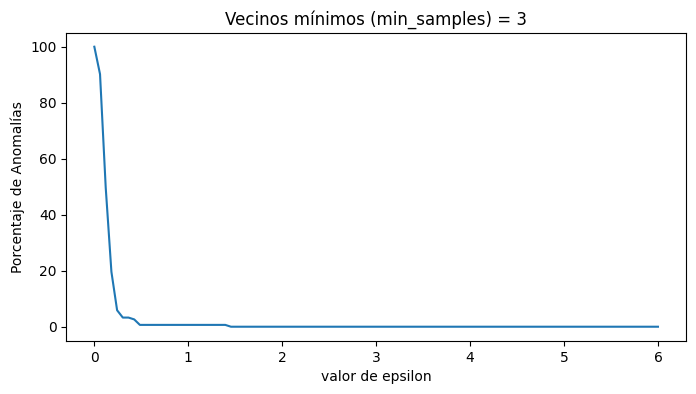

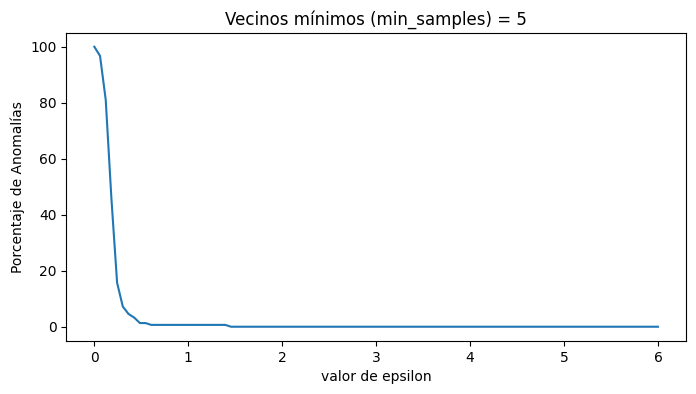

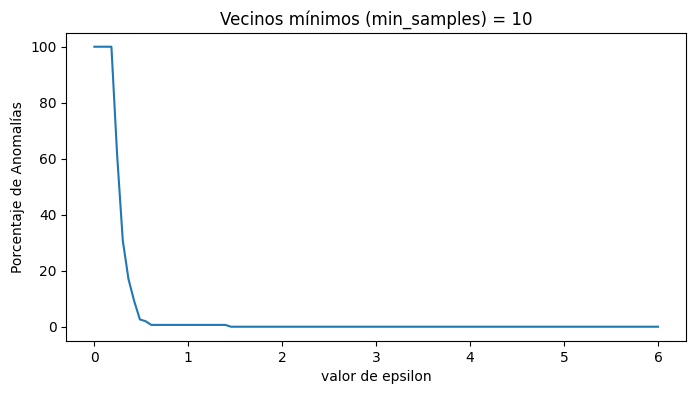

In [10]:
for min_samples in [3,5,10]:
    #Varios a pintar ahora el porcentaje de anomalías vs el valor de eps probado
    plt. figure(figsize = (8,4), dpi =100)
    sns.lineplot(x=np.linspace(0.001,6,100),y=experiments[min_samples])
    plt.ylabel("Porcentaje de Anomalías")
    plt.xlabel("valor de epsilon")
    plt.title(f"Vecinos mínimos (min_samples) = {min_samples}")
    plt.show()

In [12]:
for min_samples in [3,5,10]:
    dbscan = DBSCAN(eps = 0.5, min_samples=min_samples)
    dbscan.fit(train_set[features_finales])
    print(f"Para {min_samples} de vecinos: {pd.Series(dbscan.labels_[dbscan.labels_ != -1]).nunique()} clusters")

Para 3 de vecinos: 2 clusters
Para 5 de vecinos: 2 clusters
Para 10 de vecinos: 2 clusters


In [14]:
for min_samples in [3,5,10]:
    dbscan = DBSCAN(eps = 0.3, min_samples=min_samples)
    dbscan.fit(train_set[features_finales])
    print(f"Para {min_samples} de vecinos: {pd.Series(dbscan.labels_[dbscan.labels_ != -1]).nunique()} clusters")

Para 3 de vecinos: 3 clusters
Para 5 de vecinos: 4 clusters
Para 10 de vecinos: 3 clusters


In [16]:
pd.Series(dbscan.labels_).value_counts()

 0    51
-1    49
 1    40
 2    13
Name: count, dtype: int64

In [19]:
train_set_2f = train_set.copy()

dbscan_3 = DBSCAN(eps = 0.3, min_samples=3)
dbscan_3.fit(train_set[features_finales])
train_set_2f["cluster"] = dbscan_3.labels_

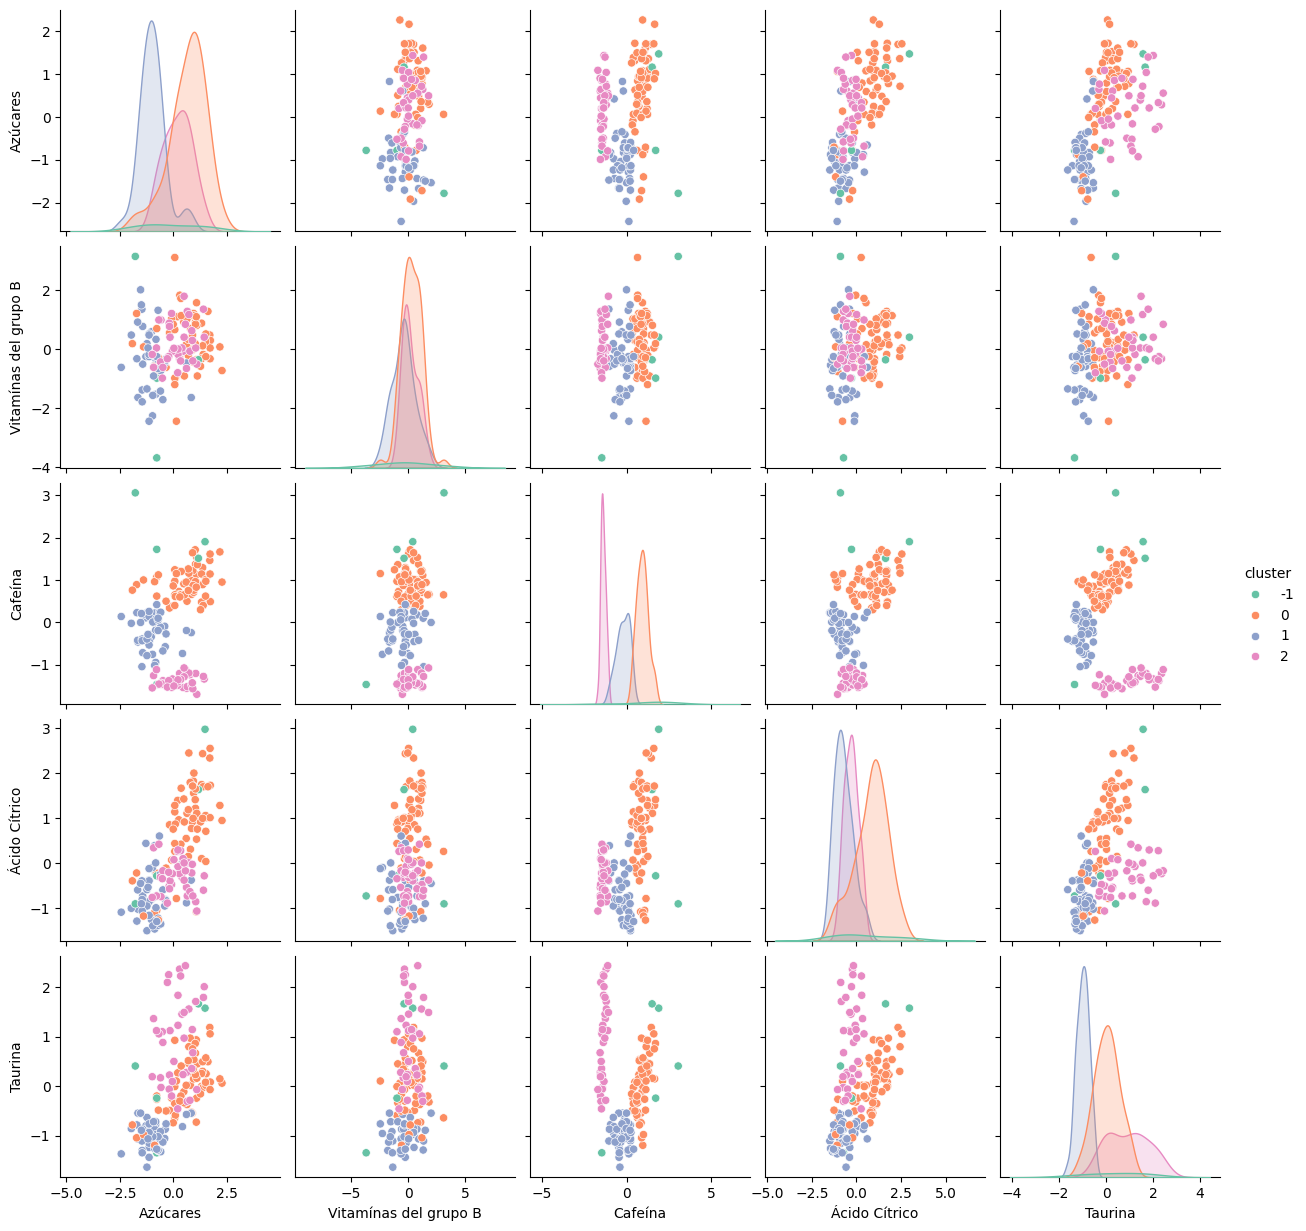

In [20]:
sns.pairplot(train_set_2f, hue= "cluster", palette= "Set2");

<Axes: xlabel='Cafeína', ylabel='Taurina'>

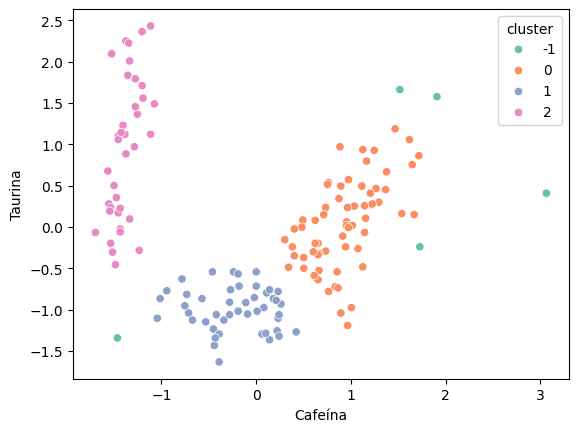

In [22]:
sns.scatterplot(data= train_set_2f, x= "Cafeína", y= "Taurina", hue= "cluster", palette= "Set2")

#### Jerarquíco-Aglomerativo

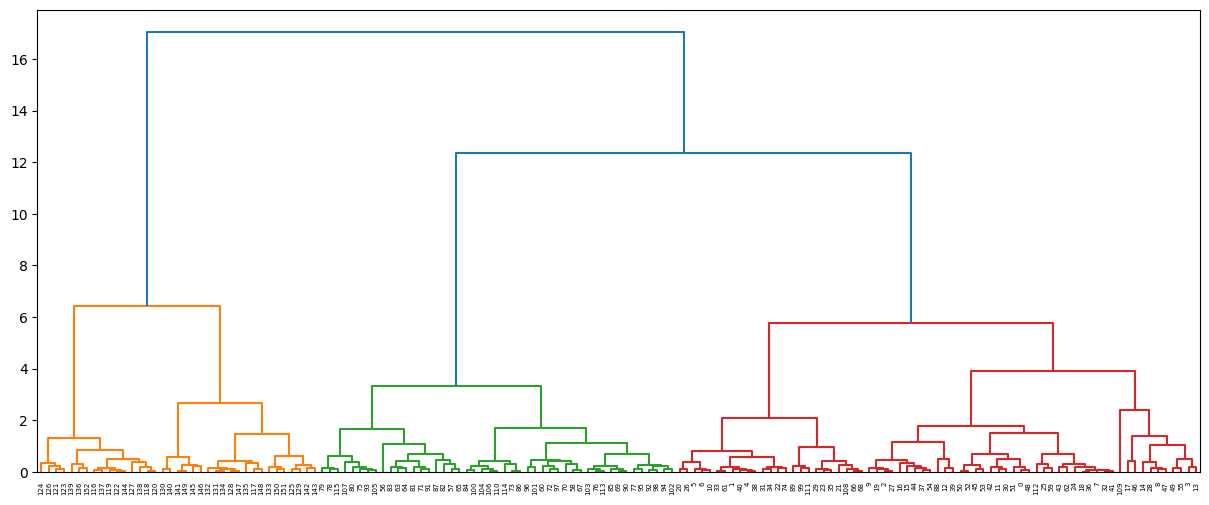

In [24]:
link_method = linkage(train_set[features_finales], method= 'ward')
plt.figure(figsize=(15,6))
dend = dendrogram(link_method)

In [25]:
clustering_model = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage='ward')
clustering_model.fit(train_set[features_finales])

train_set_agg = train_set.copy()
train_set_agg['cluster'] = clustering_model.labels_

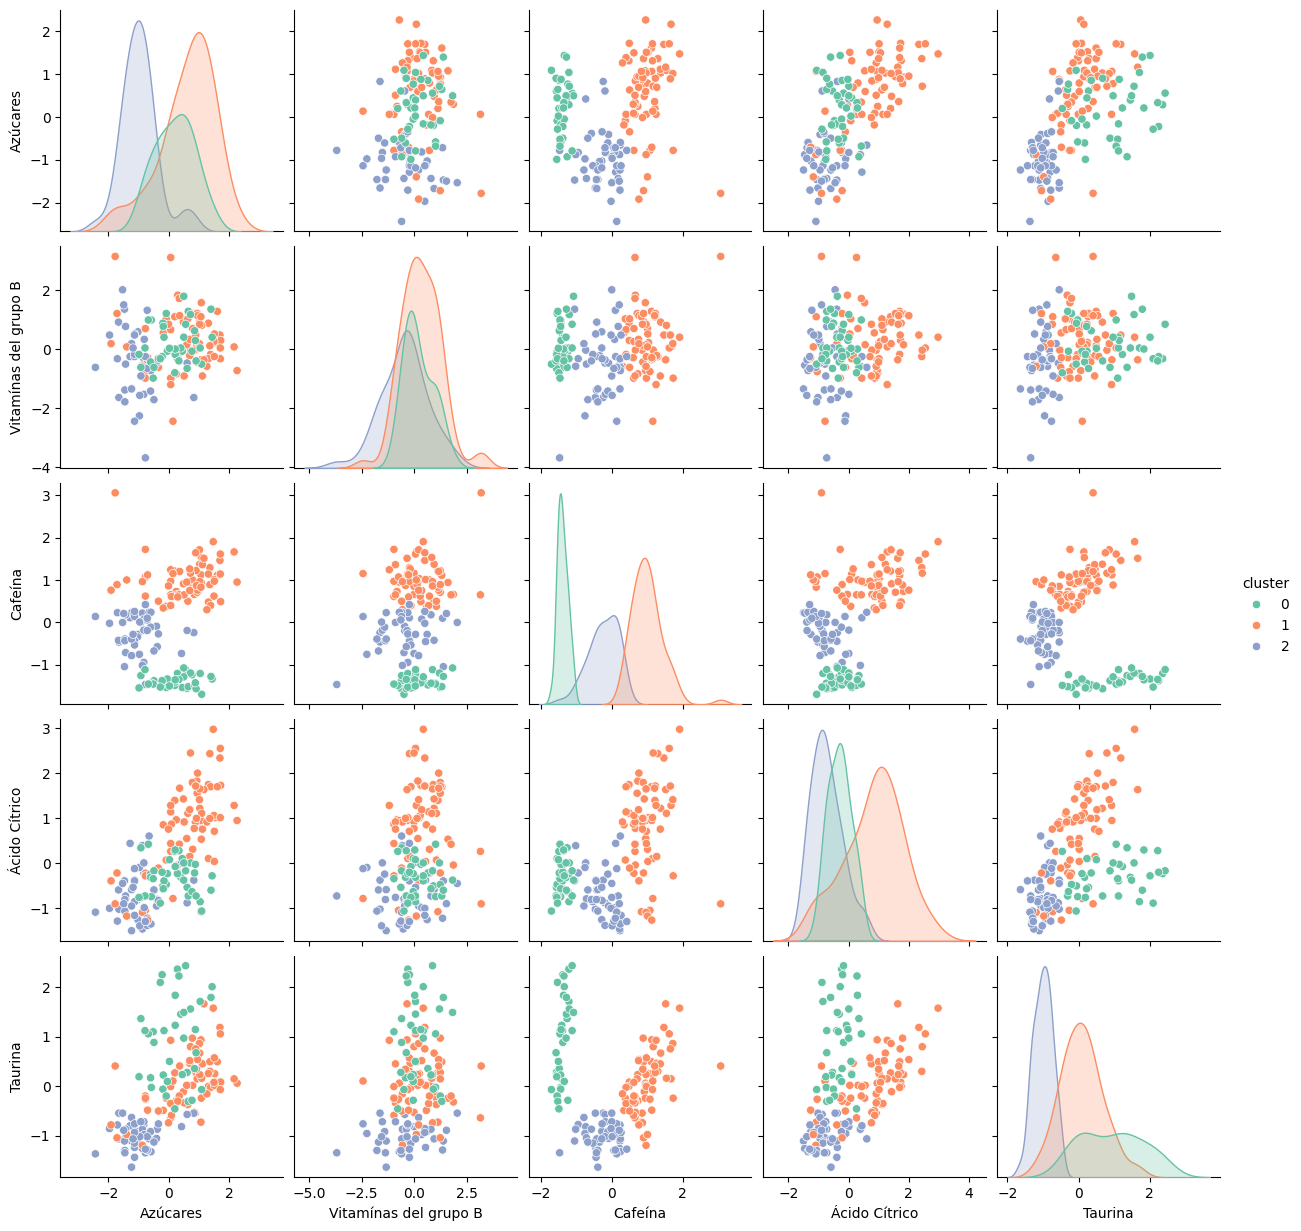

In [26]:
sns.pairplot(train_set_agg, hue= 'cluster', palette= 'Set2')

<Axes: xlabel='Cafeína', ylabel='Taurina'>

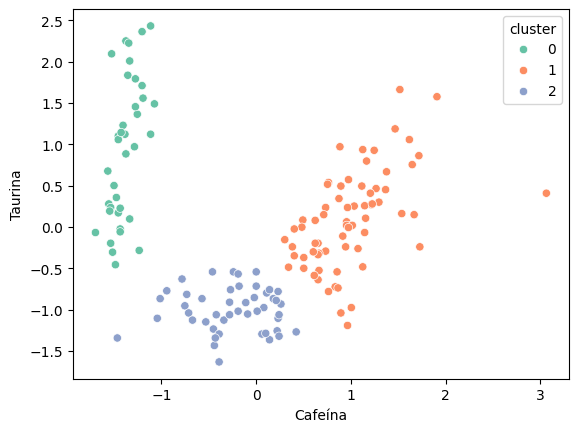

In [27]:
sns.scatterplot(data= train_set_agg, x= "Cafeína", y= "Taurina", hue= "cluster", palette= "Set2")

In [28]:
clustering_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
train_set_agg['cluster'].value_counts()

cluster
1    69
2    47
0    37
Name: count, dtype: int64

In [29]:
print(f"cluster naranja: {train_set_agg.loc[124]['cluster']}")
print(f"cluster naranja: {train_set_agg.loc[79]['cluster']}")
print(f"cluster naranja: {train_set_agg.loc[1]['cluster']}")

cluster naranja: 0.0
cluster naranja: 2.0
cluster naranja: 1.0


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [31]:
x_new =  pd.read_csv("./data/new_experiments.csv", sep= "|")
x_new

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [36]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
target = "cluster"
X_train = train_set_2f.drop(target, axis = 1) 
y_train = train_set_2f[target]

In [38]:
param_grid = {
    "n_neighbors": [2, 3, 5, 10],
    "weights": ["uniform", "distance"]
}

knn_grid = GridSearchCV(
    knn,
    param_grid=param_grid,
    cv=4,  # un "train-test" split un poco mayor del 20%
    scoring="balanced_accuracy"  # Multiclase en el que todos son importantes
)

knn_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': [2, 3, ...], 'weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",4
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also d

In [39]:
knn_grid.best_estimator_

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",2
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [40]:
knn_grid.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [41]:
knn_grid.best_score_

np.float64(0.7747395833333334)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_train, knn_grid.best_estimator_.predict(X_train)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        37

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



In [44]:
y_pred = knn_grid.best_estimator_.predict(x_new)

In [45]:
x_new["cluster"] = y_pred

In [46]:
x_new

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster
0,1.481555,0.305159,1.366128,2.239039,0.731870,0
1,0.616869,0.890014,0.583034,0.312420,-0.665332,0
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,1
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,1
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,2
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043,2


In [47]:
train_set_2f.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster
0,1.518613,0.232053,1.034819,1.013009,0.251717,0
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,0
2,0.196879,1.109334,1.215533,1.395148,0.269020,0
3,1.691550,0.487926,1.466525,2.334574,1.186068,0
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,0


In [48]:
train_set_agg.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster
0,1.518613,0.232053,1.034819,1.013009,0.251717,1
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,1
2,0.196879,1.109334,1.215533,1.395148,0.269020,1
3,1.691550,0.487926,1.466525,2.334574,1.186068,1
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,1


In [54]:
merged = train_set_2f.merge(
    train_set_agg,
    left_index=True,
    right_index=True,
    suffixes=['_DBSCAN', '_Agglo']
)

merged[['cluster_DBSCAN', 'cluster_Agglo']]

,cluster_DBSCAN,cluster_Agglo
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
148,2,0
149,2,0
150,2,0
151,2,0


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.